<a href="https://colab.research.google.com/github/mattm3456/Deep_Learning/blob/main/Manner_HW1_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Benchmarking Neural Nets with the XOR Problem

### DS 6050 - School of Data Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For deliverables, you must write code in Python/Pytorch and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 80 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_1_ann.ipynb**.



In [ ]:
# Code to restart kernel:
import os
os._exit(00)

In [1]:
# You might want to use the following packages
import numpy as np
import os
import torch
print(torch.__version__)
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

1.13.1+cu116


In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the `train / validate / test` sets. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2) (720,)
(200, 2)
(80, 2)


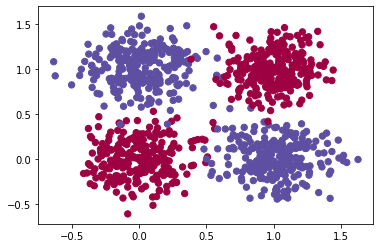

In [3]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49) 
print(X_train.shape, y_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
y_val = y_val.astype('float32')

In [5]:
train_set = TensorDataset(torch.tensor(X_train),
                          torch.tensor(y_train.reshape(-1,1)))
test_set = TensorDataset(torch.tensor(X_test),
                          torch.tensor(y_test.reshape(-1,1)))
val_set = TensorDataset(torch.tensor(X_val),
                          torch.tensor(y_val.reshape(-1,1)))


In [33]:
train_dataloader = DataLoader(train_set, batch_size = 800)
test_dataloader = DataLoader(test_set, batch_size = 200)
val_dataloader = DataLoader(val_set, batch_size = 80)

In [7]:
for X, y in train_dataloader:
  print(X.shape, y.shape)
  #break

torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([100, 2]) torch.Size([100, 1])
torch.Size([20, 2]) torch.Size([20, 1])


In [8]:
# Need to turn these numpy arrays into tensors
#X_train = torch.from_numpy(X_train)#.clone().view(-1,1)
#X_test = torch.from_numpy(X_test)#.clone().view(-1,1)
#X_val = torch.from_numpy(X_val)#.clone().view(-1,1)
#y_train = torch.from_numpy(y_train)#.clone().view(-1,1)
#y_test = torch.from_numpy(y_test)#.clone().view(-1,1)
#y_val = torch.from_numpy(y_val)#.clone().view(-1,1)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [28]:
class NeuralNetwork(nn.Module):
    def __init__(self, n0 = 2, n1 = 2, n2 = 2):
        super(NeuralNetwork, self).__init__()
        self.L1 = nn.Linear(n0, n1)
        self.tanh = nn.Tanh()
        self.L2 = nn.Linear(n1, n2)

    def forward(self, x):
        #x = self.flatten(x)
        #logits = self.linear_tanh_stack(x)
        #print('logits = ' + str(logits))
        #return logits
        out = self.L1(x)
        out = self.tanh(out)
        out = self.L2(x)
        return out


  # Your code here!
  # TODO: implement a customized module using establised functions from pytorch
  # Loss can be calculated with nn.CrossEntropyLoss()
  # Linear layer could be added to the model with nn.linear()
  # Hyperbolic tangent can be achieved with torch.tanh()
  # Use any optimizer to optimize model parameters
  # An example can be found at: https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html 
     

In [9]:
learning_rate = 1e-3
batch_size = 64
epochs = 100

In [26]:
model = NeuralNetwork(2,2,2)
# Why do I often get errors with this loss fxn?
loss_fxn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [59]:
from pandas.core.arrays.sparse import dtype
#def train(dataloader, model, optimizer, loss_func, epochs):
    #model.train()
    #all_loss = []
n_steps = len(train_dataloader)
num_epochs = 100
for epoch in range(num_epochs):
  for i, (X,y) in enumerate(train_dataloader):
    X,y = X.to(device), y.to(device)

    # Forwards
    y_hat = model(X)
    y = y.detach().numpy().astype('int64')
    y = torch.from_numpy(y)
        #y_hat = y_hat.detach().numpy()
        #y_max = np.argmax(y_hat, axis=1)
        #print(y_max)
        #y_max = torch.from_numpy(y_max)
    loss = loss_fxn(y_hat, y.squeeze())
    #print(f'Epoch {epoch} ' + str(loss))

    #all_loss.append(loss.item())
    
    #Backwards
    #loss.backward()
    
    #optimizer.step()
    #optimizer.zero_grad()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if (epoch+1) % 10 == 0:
    print(f'Epoch {epoch + 1} / {num_epochs}, loss = {loss:.4f}')
    #return all_loss
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for X,y in val_dataloader:
    X,y = X.to(device), y.to(device)
    y_hat = model(X)
    y = y.detach().numpy().astype('int64')
    y = torch.from_numpy(y)
    test_loss = loss_fxn(y_hat, y.squeeze())
    _, predictions = torch.max(y_hat, 1)
    #print(predictions)
    #print(y)
    n_correct += (predictions == y.squeeze()).sum().item() #this is giving me issues...
    n_samples += y_hat.shape[0]
    #print('n_correct. =' +str(n_correct))
    #print('n_samples. =' +str(n_samples))
    #return test_loss
    accuracy = n_correct / n_samples
    print(f'val loss = {test_loss:.4f}, val accuracy = {accuracy}')
  # Accuracy doesn't appear to be working correctly, related to dataloader issue??

Epoch 10 / 100, loss = 0.7132
Epoch 20 / 100, loss = 0.7131
Epoch 30 / 100, loss = 0.7131
Epoch 40 / 100, loss = 0.7130
Epoch 50 / 100, loss = 0.7130
Epoch 60 / 100, loss = 0.7129
Epoch 70 / 100, loss = 0.7129
Epoch 80 / 100, loss = 0.7128
Epoch 90 / 100, loss = 0.7127
Epoch 100 / 100, loss = 0.7127
val loss = 0.7506, val accuracy = 0.425


- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [12]:
# DONT MESS WITH THIS ONE
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder
import math

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2,alpha=0.01):
        """
        Initialize the network with random weights

        @param: nn_input_dim: Number of nodes in the input layer
        @param: nn_hidden_dim: Number of nodes in the hidden layer
        @param: nn_output_dim: Number of nodes in the output layer
        """
        # SUBTASK 1 (10 pts): Initialize the parameters to random values.
        np.random.seed(49)
        self.W1 = np.random.rand(n0, n1)
        self.b1 = np.random.rand()
        self.W2 = np.random.rand(n1, n2)
        self.b2 = np.random.rand()
        
    def loss(self, X, y):
        """
        Evaluate the average loss on the dataset
        """
        y = y.astype(np.int64)

        # Forward propagation will be needed to calculate the loss
        A1,A2 = self.forward_pass(X)
        # SUBTASK 2 (10 pts): Cross Entropy Loss

        y_s = np.eye(2) 
        loss_vec = (-y_s[y]*np.log(A2)).sum()
        return loss_vec


    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: a1: saved value of the output of the hidden layer
        @return: a2: activated return value of the output layer.
        """
        # SUBTASK 3 (20 pts): Implement Forward propagation.
        # Note that you must implement tanh activiation for the hiden layer, 
        #and softmax for the output layer
        Z1 = np.dot(X, self.W1)+self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(A1, self.W2)+self.b2
        A2 = np.exp(Z2)/np.sum(np.exp(Z2),axis=1, keepdims=True) # softmax func written out
        return A1, A2 

    def backward_pass(self,A1,A2,X,y):
        """
        Pass the signal back and compute the gradient

        @param: X: feature
        @param: y: label
        @param: a1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the gradient of W1
        @return: db1: the gradient of b1
        @return: dW2: the gradient of W2
        @return: db2: the gradient of b2
        """
        # You do not have to change this function, ...
        # unless you are advanced and want to use different activation function.
        m = len(y) # number of examples
        delta_2 = A2
        y = y.astype(np.int64) # needs to be int vector for indexing
        delta_2[range(m), y] -= 1
        dW2 = (A1.T).dot(delta_2)
        db2 = np.sum(delta_2, axis=0, keepdims=True)
        delta_1 = delta_2.dot(self.W2.T) * (1 - np.power(A1, 2)) # derivative
        dW1 = np.dot(X.T, delta_1)
        db1 = np.sum(delta_1, axis=0)
        return dW1, db1, dW2, db2

    def fit(self, X, y, epochs, X_val, y_val):
        """
        Learns parameters for the neural network and returns the model.
        
        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Gradient descent. For each batch...
        for i in range(0, epochs):

            # Forward pass
            A1,A2 = self.forward_pass(X);

            # Backpropagation
            dW1, db1, dW2, db2 = self.backward_pass(A1,A2,X,y)

            # SUBTASK 4 (10 pts): Compute the gradient descent parameter update
            
            self.W1 = self.W1-dW1*alpha
            self.b1 = self.b1-db1*alpha
            self.W2 = self.W2-dW2*alpha
            self.b2 = self.b2-db2*alpha
        
            # Print the loss and validation accuracy at current epoch.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_acc: %f" 
                      %(i,epochs, self.loss(X_train, y_train), self.evaluate(X_train, y_train),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        y_pred = self.predict(X)
        return sum(y_pred == y)/len(y)

    def predict(self, X):
        """
        Predict an output

        @param: X: feature
        @return: y_pred: predicted label (0 or 1)
        """
        # SUBTASK 5 (10 pts): Implement the prediction process. 
        # Hint: It should include a forward pass, and then use the class with higher probability.
        A2 = self.forward_pass(X)[1]
        y_pred = np.argmax(A2,axis=1)
        return y_pred


    def plot_decision_boundary(self, pred_func):
        """
        Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.Spectral)

In [39]:
#  MESS WITH THIS ONE!!! 


from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder
import math

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2,alpha=0.01):
        """
        Initialize the network with random weights

        @param: nn_input_dim: Number of nodes in the input layer
        @param: nn_hidden_dim: Number of nodes in the hidden layer
        @param: nn_output_dim: Number of nodes in the output layer
        """
        # SUBTASK 1 (10 pts): Initialize the parameters to random values.
        np.random.seed(49)
        self.W1 = np.random.rand(n0, n1)
        self.b1 = np.random.rand()
        self.W2 = np.random.rand(n1, n2)
        self.b2 = np.random.rand()
        
    def loss(self, X, y):
        """
        Evaluate the average loss on the dataset
        """
        y = y.astype(np.int64)

        # Forward propagation will be needed to calculate the loss
        A1,A2 = self.forward_pass(X)
        # SUBTASK 2 (10 pts): Cross Entropy Loss

        y_s = np.eye(2) 
        loss_vec = (-y_s[y]*np.log(A2)).sum()
        return loss_vec


    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: a1: saved value of the output of the hidden layer
        @return: a2: activated return value of the output layer.
        """
        # SUBTASK 3 (20 pts): Implement Forward propagation.
        # Note that you must implement tanh activiation for the hiden layer, 
        #and softmax for the output layer
        Z1 = np.dot(X, self.W1)+self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(A1, self.W2)+self.b2
        A2 = np.exp(Z2)/np.sum(np.exp(Z2),axis=1, keepdims=True) # softmax func written out
        return A1, A2 

    def backward_pass(self,A1,A2,X,y):
        """
        Pass the signal back and compute the gradient

        @param: X: feature
        @param: y: label
        @param: a1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the gradient of W1
        @return: db1: the gradient of b1
        @return: dW2: the gradient of W2
        @return: db2: the gradient of b2
        """
        # You do not have to change this function, ...
        # unless you are advanced and want to use different activation function.
        m = len(y) # number of examples
        delta_2 = A2
        y = y.astype(np.int64) # needs to be int vector for indexing
        delta_2[range(m), y] -= 1
        dW2 = (A1.T).dot(delta_2)
        db2 = np.sum(delta_2, axis=0, keepdims=True)
        delta_1 = delta_2.dot(self.W2.T) * (1 - np.power(A1, 2)) # derivative
        dW1 = np.dot(X.T, delta_1)
        db1 = np.sum(delta_1, axis=0)
        return dW1, db1, dW2, db2

    def fit(self, X, y, epochs, X_val, y_val):
        """
        Learns parameters for the neural network and returns the model.
        
        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Gradient descent. For each batch...
        for i in range(0, epochs):

            # Forward pass
            A1,A2 = self.forward_pass(X);

            # Backpropagation
            dW1, db1, dW2, db2 = self.backward_pass(A1,A2,X,y)

            # SUBTASK 4 (10 pts): Compute the gradient descent parameter update
            
            self.W1 = self.W1-dW1*alpha
            self.b1 = self.b1-db1*alpha
            self.W2 = self.W2-dW2*alpha
            self.b2 = self.b2-db2*alpha
        
            # Print the loss and validation accuracy at current epoch.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_acc: %f" 
                      %(i,epochs, self.loss(X_train, y_train), self.evaluate(X_train, y_train),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        y_pred = self.predict(X)
        return sum(y_pred == y)/len(y)

    def predict(self, X):
        """
        Predict an output

        @param: X: feature
        @return: y_pred: predicted label (0 or 1)
        """
        # SUBTASK 5 (10 pts): Implement the prediction process. 
        # Hint: It should include a forward pass, and then use the class with higher probability.
        A2 = self.forward_pass(X)[1]
        y_pred = np.argmax(A2,axis=1)
        return y_pred


    def plot_decision_boundary(self, pred_func):
        """
        Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.Spectral)

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version. 

Epoch 0/100 - loss: 6182.934413 - accuracy: 0.513889 - val_loss: 833.241340 - val_acc: 0.412500
Epoch 10/100 - loss: 13098.447105 - accuracy: 0.486111 - val_loss: 1113.336353 - val_acc: 0.587500
Epoch 20/100 - loss: 7083.270648 - accuracy: 0.486111 - val_loss: 600.209449 - val_acc: 0.587500
Epoch 30/100 - loss: 2117.732189 - accuracy: 0.862500 - val_loss: 151.955402 - val_acc: 0.900000
Epoch 40/100 - loss: 507.142398 - accuracy: 0.920833 - val_loss: 42.254676 - val_acc: 0.962500
Epoch 50/100 - loss: 424.291244 - accuracy: 0.923611 - val_loss: 35.546277 - val_acc: 0.962500
Epoch 60/100 - loss: 263.430341 - accuracy: 0.950000 - val_loss: 36.689626 - val_acc: 0.925000
Epoch 70/100 - loss: 463.521394 - accuracy: 0.868056 - val_loss: 27.377554 - val_acc: 0.925000
Epoch 80/100 - loss: 386.182066 - accuracy: 0.934722 - val_loss: 48.035546 - val_acc: 0.950000
Epoch 90/100 - loss: 369.696122 - accuracy: 0.922222 - val_loss: 35.041567 - val_acc: 0.962500
test: 0.915


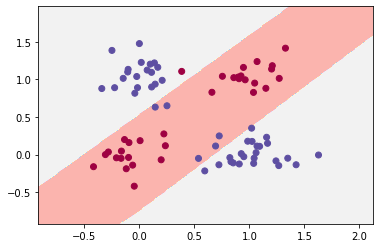

In [20]:
# MODEL 1: Some hyperparameters are provided, but feel free to change them.
n0 = 2 # input layer dimensionality
n2 = 2 # output layer dimensionality
n1 = 10 # hidden layer dimensionality
alpha = 0.01 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs
# Build a model with 3 layer
myModel1 = MyNeuralNet(n0, n1, n2);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)

# Plot the decision boundary
# WHY ISNT PLOT WORKING

myModel1.plot_decision_boundary(lambda x: myModel1.predict(x))

# See the weights and biases of the network
print("test:",myModel1.evaluate(X_test, y_test))


Epoch 0/100 - loss: 11914.978370 - accuracy: 0.486111 - val_loss: 1056.682989 - val_acc: 0.587500
Epoch 10/100 - loss: 6301.835002 - accuracy: 0.513889 - val_loss: 851.713332 - val_acc: 0.412500
Epoch 20/100 - loss: 3461.379507 - accuracy: 0.513889 - val_loss: 463.015492 - val_acc: 0.412500
Epoch 30/100 - loss: 519.287499 - accuracy: 0.880556 - val_loss: 38.891773 - val_acc: 0.887500
Epoch 40/100 - loss: 60.750442 - accuracy: 0.977778 - val_loss: 10.421646 - val_acc: 0.975000
Epoch 50/100 - loss: 42.538793 - accuracy: 0.983333 - val_loss: 7.168711 - val_acc: 0.975000
Epoch 60/100 - loss: 28.303609 - accuracy: 0.983333 - val_loss: 5.490597 - val_acc: 0.975000
Epoch 70/100 - loss: 22.721288 - accuracy: 0.981944 - val_loss: 4.288809 - val_acc: 0.975000
Epoch 80/100 - loss: 21.247490 - accuracy: 0.986111 - val_loss: 3.768617 - val_acc: 0.987500
Epoch 90/100 - loss: 20.528520 - accuracy: 0.986111 - val_loss: 3.578474 - val_acc: 0.987500
test: 0.97


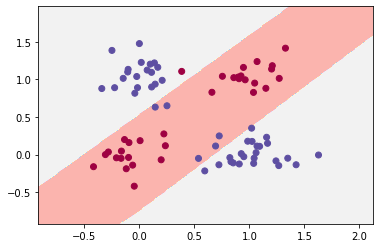

In [21]:
# MODEL 2 here

# MODEL 2: Some hyperparameters are provided, but feel free to change them.
n0 = 2 # input layer dimensionality
n2 = 2 # output layer dimensionality
n1 = 20 # hiden layer dimensionality
alpha = 0.005 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs
# Build a model with 3 layer
myModel2 = MyNeuralNet(n0, n1, n2);
myModel2.fit(X_train, y_train, epochs, X_val, y_val)

# Plot the decision boundary
# WHY ISNT PLOT WORKING

myModel2.plot_decision_boundary(lambda x: myModel1.predict(x))

# See the weights and biases of the network
print("test:",myModel2.evaluate(X_test, y_test))

Epoch 0/100 - loss: 12040.560608 - accuracy: 0.486111 - val_loss: 1064.568901 - val_acc: 0.587500
Epoch 10/100 - loss: 6123.844893 - accuracy: 0.508333 - val_loss: 539.264479 - val_acc: 0.612500
Epoch 20/100 - loss: 1390.725386 - accuracy: 0.673611 - val_loss: 125.521272 - val_acc: 0.750000
Epoch 30/100 - loss: 1231.461929 - accuracy: 0.652778 - val_loss: 108.020831 - val_acc: 0.737500
Epoch 40/100 - loss: 456.639711 - accuracy: 0.691667 - val_loss: 36.665833 - val_acc: 0.762500
Epoch 50/100 - loss: 75.323806 - accuracy: 0.986111 - val_loss: 7.984007 - val_acc: 0.987500
Epoch 60/100 - loss: 64.517424 - accuracy: 0.987500 - val_loss: 7.157821 - val_acc: 0.987500
Epoch 70/100 - loss: 57.376822 - accuracy: 0.987500 - val_loss: 6.473734 - val_acc: 0.987500
Epoch 80/100 - loss: 52.215082 - accuracy: 0.987500 - val_loss: 5.993817 - val_acc: 0.987500
Epoch 90/100 - loss: 48.316810 - accuracy: 0.987500 - val_loss: 5.643205 - val_acc: 0.987500
test: 0.98


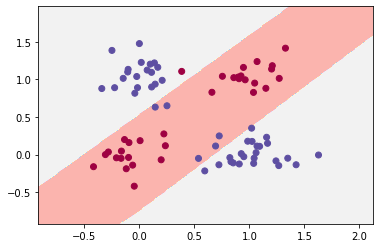

In [23]:

# MODEL 3: Some hyperparameters are provided, but feel free to change them.
n0 = 2 # input layer dimensionality
n2 = 2 # output layer dimensionality
n1 = 100 # hiden layer dimensionality
alpha = .001 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs
# Build a model with 3 layer
myModel3 = MyNeuralNet(n0, n1, n2);
myModel3.fit(X_train, y_train, epochs, X_val, y_val)

# Plot the decision boundary

myModel3.plot_decision_boundary(lambda x: myModel1.predict(x))

# See the weights and biases of the network

print("test:",myModel3.evaluate(X_test, y_test))

In [ ]:
# COMPARISONS OF THESE MODELS WITH THE STANDARD LIBRARY MODEL IN TASK 2


## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

My network performed very well, with an accuracy in the 98% range for Model 3, which had 100 nodes in the hidden layer and a learning rate of 10^-3. Model 2, which had 20 hidden nodes and 0.005 learning rate, had an accuracy of approx. 97%. Model 1, with 10 hidden nodes and learning rate of 0.01, scored an accuracy of 91.5%. The PyTorch model only performed to an accuracy of about 42%, which may be a computational error. The main difficulty in the implementation for me was managing the dimensionality of the various tensors, and ensuring data was properly formatted for loss functions. Overall, I did learn quite a bit about neural network implementation and fundamentals through this assignment. It was very difficult (and more than a little frustrating, particularly with dimension/data type issues) but I consider it a successful assignment. 

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lecture slides on Module 2.
 * Post a question in Piazza.
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <vga8uf@virginia.edu> with subject starting "DS 6050 Assignment 1:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!